# Dados coletados do experimento 

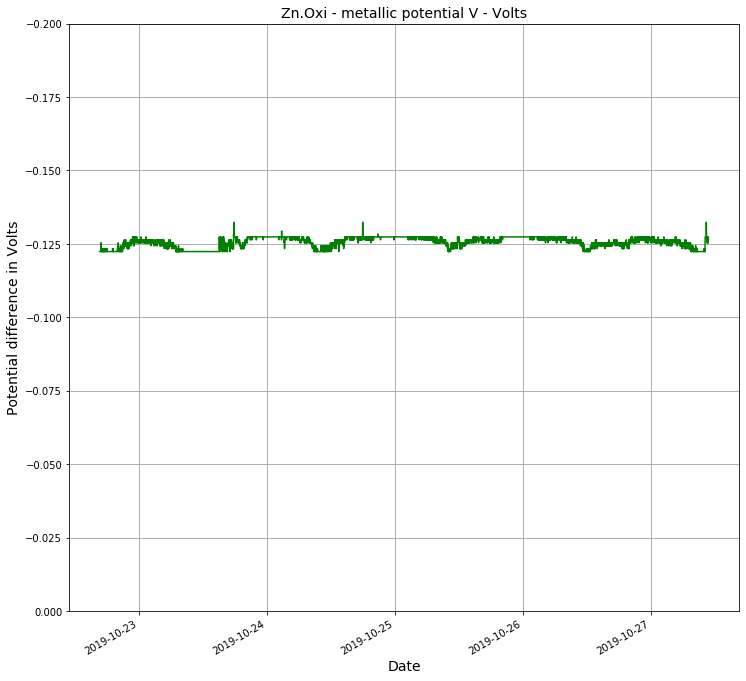

In [53]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", solucao1, 7420, len(solucao1), 0, -0.200,
            minutos=1, cor='green')

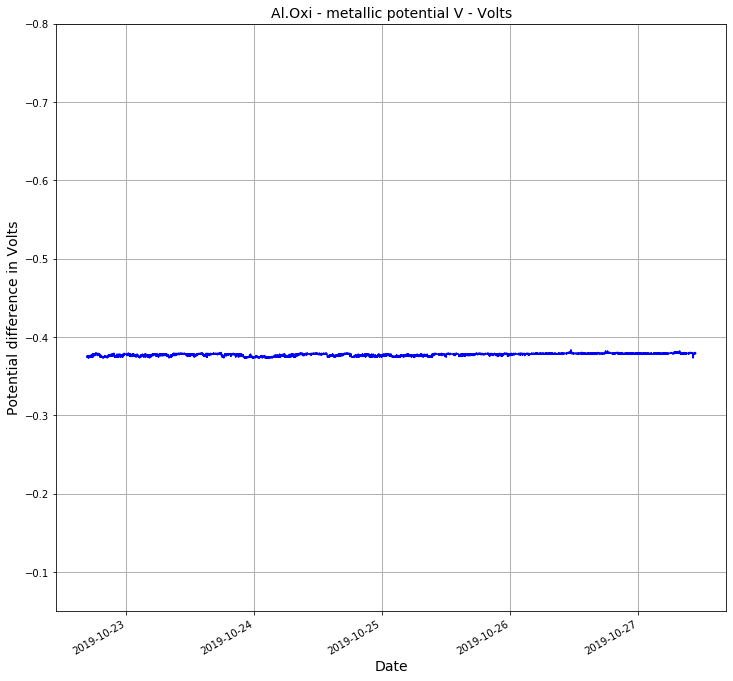

In [52]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts", solucao2, 7420, len(solucao2), -0.05, -0.800, 
            minutos=1, cor='blue')

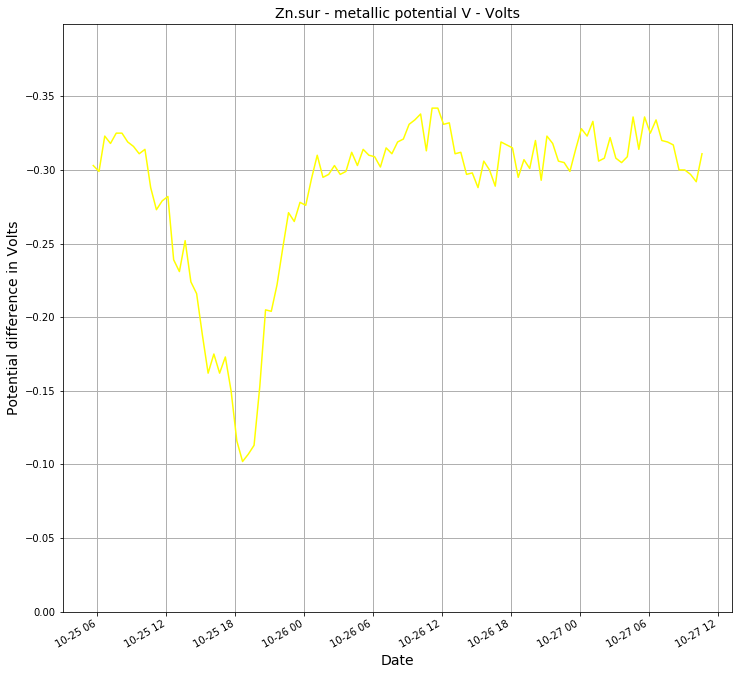

In [56]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts",solucao3, 7420, 
            len(solucao3), -0.00, solucao3.min()-0.05, minutos=30, cor='yellow')

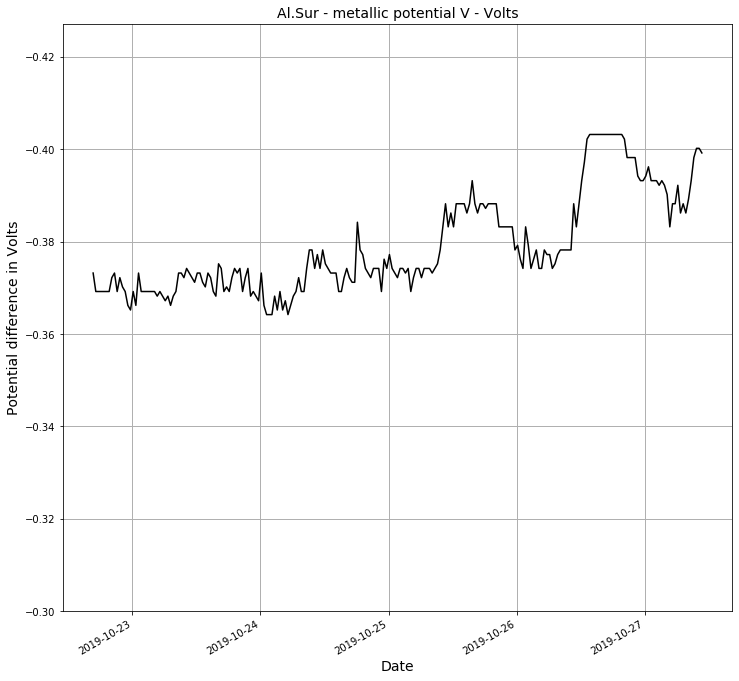

In [57]:
geraGrafico("Date", "Al.Sur - metallic potential V - Volts", solucao4, 7420, len(solucao4), -0.30, 
            solucao4[100:].min(), minutos=30, cor='black')




# Programa

In [36]:
#Necessário para os gráficos

#DEBUG


import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)

import pandas as pd
import numpy as np

from pandas.plotting import register_matplotlib_converters

import matplotlib.pyplot as plt

In [20]:
dados = pd.read_csv('DADOS.CSV', sep=',', header=None)

### Tratamento de dados, agregações e nova tabela

In [21]:
dados = dados.iloc[:, 0:10]

horas = []
for i in range(0, len(dados)):
    #Modelo: 2017-01-01 05:03 
    horas.append(("%d-%d-%d %d:%d:%d" %(dados[6][i], dados[5][i], 
                 dados[4][i], dados[7][i], dados[8][i], dados[9][i])))
    
dados = dados.iloc[:, 0:4]
horario = pd.to_datetime(horas)
dados = dados.join(pd.DataFrame(horario), how='outer', rsuffix=' ')
dados = dados.set_index('0 ')
dados.columns = ['Solucao 1', 'Solucao 2', 'Solucao 3', 'Solucao 4']
dados.index.name = 'Horario'


### Cálculo do potencial

##### Sequencia:
###### > Zinco
##### > Aluminio
###### > Zinco
###### > Aluminio


In [22]:
dados

,Solucao 1,Solucao 2,Solucao 3,Solucao 4
Horario,,,,
2019-10-17 13:01:50,-0.335,-0.535,-0.780,-0.767
2019-10-17 13:02:00,-0.338,-0.541,-0.791,-0.787
2019-10-17 13:03:00,-0.366,-0.549,-0.823,-0.824
2019-10-17 13:04:00,-0.479,-0.572,-0.833,-0.831
2019-10-17 13:05:00,-0.557,-0.648,-0.836,-0.836
2019-10-17 13:06:00,-0.577,-0.674,-0.838,-0.836
2019-10-17 13:07:00,-0.592,-0.680,-0.840,-0.836
2019-10-17 13:08:00,-0.602,-0.673,-0.841,-0.838
2019-10-17 13:09:00,-0.601,-0.630,-0.840,-0.836


##### Adicionando OFFSET dos materiais

In [11]:
solucao1 = -0.9484 - dados.iloc[:, 0]
solucao2 = dados.iloc[:, 1] + 0.2518
solucao3 = -0.948 - dados.iloc[:, 2] 
solucao4 = dados.iloc[:, 3] + 0.2518 

solucao4[6500:]

Horario
2019-10-22 01:21:00   -0.3692
2019-10-22 01:22:00   -0.3692
2019-10-22 01:23:00   -0.3692
2019-10-22 01:24:00   -0.3692
2019-10-22 01:25:00   -0.3692
2019-10-22 01:26:00   -0.3692
2019-10-22 01:27:00   -0.3692
2019-10-22 01:28:00   -0.3692
2019-10-22 01:29:00   -0.3692
2019-10-22 01:30:00   -0.3692
2019-10-22 01:31:00   -0.3692
2019-10-22 01:32:00   -0.3692
2019-10-22 01:33:00   -0.3692
2019-10-22 01:34:00   -0.3692
2019-10-22 01:35:00   -0.3692
2019-10-22 01:36:00   -0.3692
2019-10-22 01:37:00   -0.3682
2019-10-22 01:38:00   -0.3692
2019-10-22 01:39:00   -0.3692
2019-10-22 01:40:00   -0.3692
2019-10-22 01:41:00   -0.3692
2019-10-22 01:42:00   -0.3692
2019-10-22 01:43:00   -0.3692
2019-10-22 01:44:00   -0.3692
2019-10-22 01:45:00   -0.3692
2019-10-22 01:46:00   -0.3692
2019-10-22 01:47:00   -0.3692
2019-10-22 01:48:00   -0.3692
2019-10-22 01:49:00   -0.3692
2019-10-22 01:50:00   -0.3692
                        ...  
2019-10-27 10:19:00   -0.4032
2019-10-27 10:20:00   -0.4022
20

##### Filtrando os ruídos

In [23]:
solucao3 = solucao3[(solucao3 <= -0.01)]

In [24]:
def geraGrafico(nomeX, titulo, solucao, dadosmin, dadosmax, 
                limY_inf=0, limY_sup=2.5, minutos=10, cor='red'):
    solucao = solucao.iloc[range(dadosmin, dadosmax, minutos)] 
    plt.title(titulo, fontsize=14)
    plt.xlabel(nomeX, fontsize=14)
    plt.ylabel("Potential difference in Volts", fontsize=14)
    
    plt.ylim(limY_inf, limY_sup)
    plt.grid(True, linewidth=1)
    plt.gcf().autofmt_xdate()
    plt.plot(solucao, color=cor)